In [7]:
%load_ext pretty_jupyter
import numpy as np

# Word Embedding

Machine learning models only work with a numeric representation of input data. Suppose we have a training corpus with three  sentences:

- "the dog saw a cat", 
- "the dog chased the cat", 
- "the cat climbed a tree".

The corpus vocabulary has eight words, which are listed alphabetically.

|index | vocabulary | 
| --- | ---  |
|1 |a   | 
|2 |cat |
|3 |chased |
|4 |climbed |
|5 |dog |
|6 |saw |
|7 |the |
|8 |tree |

## Tokenization

The different units into which you can break down text are called tokens. The token can be a word (e.g. "cat"), or a phrase (e.g., "the cat", or "a cat"). Eventually, we will transform each token to a numeric vector.

In [205]:
from keras.preprocessing.text import Tokenizer

texts = ["the dog saw a cat",
         "the dog chased the cat",
         "the cat climbed a tree"]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
print("The count of words",tokenizer.word_counts)
print("The sequences generated from text are : ",sequences)

The count of words OrderedDict([('the', 4), ('dog', 2), ('saw', 1), ('a', 2), ('cat', 3), ('chased', 1), ('climbed', 1), ('tree', 1)])
The sequences generated from text are :  [[1, 3, 5, 4, 2], [1, 3, 6, 1, 2], [1, 2, 7, 4, 8]]


The example includes 8 tokens (one for each word) and assign an integer to each token (e.g. dog = 3).

## One-hot encoding

One-hot encoding is the most common, most basic way to turn a token into a vector. It is a binary vector of the size of the vocabulary where the vector has 1 for the index of the word, and 0 elsewhere. For example, "cat" has index 2 in the alphabetical order of the vocabulary. Then, the one-hot encoding of the word "cat" can be
$$\underbrace{[0,1,0,0,0,0,0,0]}_{8}$$
and, the sentence "the dog saw a cat" can be represented as a $5 \times 8$ matrix
\begin{align*}
\left[
\begin{array}{*{8}c}
0,0,0,0,0,0,1,0 \\
0,0,0,0,1,0,0,0\\
0,0,0,0,0,1,0,0\\
1,0,0,0,0,0,0,0\\
0,1,0,0,0,0,0,0
\end{array} \right]
\end{align*}
since the sentence has 5 words and the corpus vocabulary has 8 words.

One-hot encoding has two drawbacks for natural language processing (NLP) tasks:

- The dimensionality of the vector space becomes very high and sparse because each vector has the size of the vocabulary.

- There is no connection between words with similar meanings. For example, it is impossible to know that "dog" and "cat" are both pets.

## Embedding layers

A popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings.

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/intro_to_analytics/Sequential_Models/figures/word_embedding.jpg" width="800">

Given input texts, a word embedding model constructs a numeric vector for each word, resulting in a numeric representation of the input texts.

A word embedding model is built from a training corpus. Initially, we represent the training texts by simply using frequency encoding or one-hot encoding. We can think the embedding model as a mathematical model that involving many caculations. After sending the numeric representation of the trainning text, embedding model 


Machine learning models don't take raw text as input and they only work with numeric tensors. In natural language processing (NLP), word embedding is a projection of a word into meaningful vectors of real numbers.




One-hot encoding is a binary vector of the size of the vocabulary where the vector is all zeros, but has 1 for the index of the word. 
We can also encode the sentence based on the frequency of each word's occurrence. Then, the sentence “the dog saw a cat” becomes an array
$$[4, 2, 1, 2, 3]$$

## Sentiment Analysis of IMDB Movie Reviews

The IMDB dataset is a commonly used dataset for machine learning tutorials related to text and language. It contains 50,000 movie reviews, with 25,000 in the training set and 25,000 in the testing set, collected from IMDB. Each review in the dataset has been labeled with a binary sentiment: positive (1) or negative (0). The following code loads the IMDB data:
```python
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
```
The raw data contains the text of each movie review. Keras provides a built-in function that replaces the raw text in both the training and testing datasets with integers based on the frequency of each word's occurrence in the entire training dataset. For instance the integer "3" encodes the 3rd most frequent word in the data. 

The resulting `x_train` is a numpy array containing 25,000 lists, and only the `num_words` most frequent words are kept. Each list may have a different length due to different review lengths.

In [29]:
def show_review(index):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[index]])
    print('Review:\n', decoded_review)
    print('--------------------------')
    print('Number of words:', len(decoded_review.split()))
    print('sentiment:', y_train[0])
    # print('Indices for all ?s:', [x_train[index][i] for i, w in enumerate(decoded_review.split()) if w == '?'])

from keras.datasets import imdb

max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print("Example of dictionary:\n",dict(sorted(reverse_word_index.items())[10:15]))
show_review(0)
# print("Decode review x_train[0][:10]]:\n",
#       ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0][:10]]))

Example of dictionary:
 {11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for'}
Review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film 

Before training a machine learning model, the dataset needs to be preprocessed, such as removing frequently occurring words that do not contribute much to the meaning of the text, such as stopwords like "the," "and," or "a". Additionally, most machine learning algorithms expect to see the same number of features, i.e., the same length for each list.

To achieve this, the pad_sequences function sets the maximum number of words in each review (i.e., maxlen):
```python
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
```
For reviews that have fewer than maxlen words, we pad them with "0", while for reviews that have more than maxlen words, we truncate them.

In [31]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
import keras
from keras.datasets import imdb
from keras import models, layers
from keras.utils import pad_sequences
from keras import backend as K

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_features, output_dim=8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# show model summary
model.summary()

# show fitting information
vars(history)

# Create a Keras model with input and all layers' output
layer_outputs = [layer.output for layer in model.layers]
model_with_output = keras.Model(inputs=model.input, outputs=layer_outputs)

# Compute the outputs of all layers for the input tensor
outputs = model_with_output(x_train)
weights = [layer.get_weights() for layer in model.layers]

There are max_features (10,000) words in the vocabulary. The embedding layer converts each word into a fixed-length vector of a defined size (8 in this case). The length of the input sequence for the Embedding layer is `maxlen`, which is the length of each x_train[i] sequence. As shown in the figure, the output of the first review is a 20x8 tensor where each word (e.g., 4) is converted to a vector in the `weights` of the embedding layer (e.g., weights[4]).

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/intro_to_analytics/Sequential_Models/figures/embedding.jpg" width="600">

The Flatten layer is used to convert a multi-dimensional tensor into a single-dimensional tensor by removing all dimensions except for one.

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/intro_to_analytics/Sequential_Models/figures/flatten.jpg" width="700">

The Dense layer produces the final output for classification.

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/intro_to_analytics/Sequential_Models/figures/dense.jpg" width="700">



<!-- {a, cat, chased, climbed, dog, saw, the, tree} -->

Once ordered alphabetically, each word can be referenced by its index. 

In [9]:
import keras

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
# from torchtext.datasets import IMDB

# Load the IMDB dataset
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

from keras.utils import pad_sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define a custom dataset class
class IMDBDataset(Dataset):
    def __init__(self, x, y):
        self.x = [torch.LongTensor(sample) for sample in x]
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Pad the sequences to a fixed length
# x_train = pad_sequence(x_train, batch_first=True, padding_value=0)
# x_test = pad_sequence(x_test, batch_first=True, padding_value=0)

# Create the model
class IMDBModel(nn.Module):
    def __init__(self):
        super(IMDBModel, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=max_features, embedding_dim=8)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(in_features=maxlen*8, out_features=1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

model = IMDBModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters())

# Define the dataset and data loaders
train_dataset = IMDBDataset(x_train, y_train)
test_dataset = IMDBDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Train the model
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1} loss: {epoch_loss:.4f}")

OSError: [WinError 182] The operating system cannot run %1. Error loading "C:\Users\mzhao\Anaconda3\envs\py39\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

## Pretrained Word Embeddings

In [196]:
import os
from keras.preprocessing.text import Tokenizer

imdb_dir = "C:\\Users\\mzhao\\Downloads\\aclImdb\\aclImdb"
test_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200
validation_samples = 10000
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [158]:
import pandas as pd
import random

data = pd.read_csv("retail.csv")

customers = data.CustomerID.unique().tolist()
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

In [114]:
# list to capture purchase history of the customers
train_data = []
longest = 0
# populate the list with the product codes
for i in customers_train:
    temp = data[data["CustomerID"] == i]["StockCode"].tolist()
    if len(temp) > longest:
        longest = len(temp)
    train_data.append(temp)

In [155]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=train_data, 
                 vector_size=100, 
                 window=longest, 
                 min_count=1, 
                 workers=4)

In [153]:
catalog = data[['StockCode','Description']].drop_duplicates()
catalog = pd.Series(catalog.Description.values,index=catalog.StockCode).to_dict()

In [164]:
item = '21506'
print(catalog[item], model.wv.get_vector(item))
# model.wv.most_similar('90019A', topn=10)
# print(data[data["CustomerID"] == 13408]["StockCode"].tolist())
[(catalog[i],i,s) for (i,s) in model.wv.most_similar(item, topn=10)]

fancy font birthday card,  [ 4.0704374  -0.22106545 -0.59359145  1.9778492  -3.4744737   0.15816163
 -0.4869984  -0.09155636  0.7313011  -1.1964443   2.2655969   0.40903243
  2.300708    2.2600214  -0.18437724 -2.5046859   0.84504133  2.1785254
 -2.2461796  -0.41344282  1.146358    0.7075168   1.168436    1.6376145
 -1.3849007   0.1322     -1.8882684  -3.2134023  -2.7833428   3.2070143
 -1.1483601   3.3133862  -0.48263362  0.27444142 -1.8520232   1.4065834
 -0.37015316  0.5616905   1.4450984  -3.695895   -1.3664227   0.99329466
  0.37704632 -1.3385558  -1.4899579  -1.6486493   0.33262435 -8.018287
  0.61036426  0.31012124 -1.4512694   0.79294133  0.7805817  -0.8608317
  0.3281135  -0.6267116  -2.502889    0.28152987 -2.4738226  -0.0701296
 -1.494042   -0.5871988  -1.7151927  -0.04570224  0.6937349  -0.283201
  2.7495005  -4.2997017  -2.798139    1.2615929   1.7535899   2.2932553
 -0.44363186 -1.8016801   2.965545    1.6557103  -2.1493094   0.2981701
 -3.0025198  -3.365834    3.8598619 

[('swallows greeting card', '22030', 0.9560685753822327),
 ('robot birthday card', '22037', 0.8443895578384399),
 ('card billboard font', '22983', 0.8401292562484741),
 ('banquet birthday  card  ', '22026', 0.8324193954467773),
 ('wrap gingham rose ', '22986', 0.8145104050636292),
 ('card cat and tree ', '22718', 0.8039556741714478),
 ('wrap billboard fonts design', '22985', 0.7852078676223755),
 ('card wedding day', '22715', 0.776096761226654),
 ('wrap vintage leaf design', '23232', 0.7712549567222595),
 ('fancy fonts birthday wrap', '21497', 0.7692080736160278)]

In [159]:
validation = data[~data['CustomerID'].isin(customers_train)]
validation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
253,536394,21506,"fancy font birthday card,",24,12/1/2010 10:39,0.42,13408,United Kingdom
254,536394,22633,hand warmer union jack,96,12/1/2010 10:39,1.85,13408,United Kingdom
255,536394,22866,hand warmer scotty dog design,96,12/1/2010 10:39,1.85,13408,United Kingdom
256,536394,22865,hand warmer owl design,96,12/1/2010 10:39,1.85,13408,United Kingdom
257,536394,22632,hand warmer red retrospot,96,12/1/2010 10:39,1.85,13408,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680,France
406825,581587,22899,children's apron dolly girl,6,12/9/2011 12:50,2.10,12680,France
406826,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680,France
406827,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680,France


In [165]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [167]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [190]:
# nltk.download('abc')
# nltk.download('punkt')
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\mzhao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping models\word2vec_sample.zip.


True

In [191]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780907511711121),
 ('undergraduate', 0.6587096452713013)]

# RNN
## Simple RNN

In [30]:
max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Embedding(10000, 8))
model.add(layers.SimpleRNN(16))

# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
Total params: 80,400
Trainable params: 80,400
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Create a Keras model with input and all layers' output
layer_outputs = [layer.output for layer in model.layers]
model_with_output = keras.Model(inputs=model.input, outputs=layer_outputs)

# Compute the outputs of all layers for the input tensor
outputs = model_with_output(x_train)
weights = [layer.get_weights() for layer in model.layers]

In [21]:
# weights[0][0][x_train[0][1]], outputs[0][0]
outputs[1][0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.06555703, -0.03856479,  0.07951305, -0.16726314, -0.07529365,
        0.02212742, -0.02026786, -0.04387271,  0.01329855, -0.02792788,
        0.12781449, -0.10273641,  0.00038305,  0.08441611, -0.08616555,
        0.07417635,  0.03580396, -0.06360581,  0.10678901,  0.03336492,
        0.07783552, -0.03432852,  0.02323227,  0.06389533, -0.03654022,
        0.08909026, -0.01203921, -0.00381233, -0.03260984, -0.11244239,
        0.02235624, -0.05727508], dtype=float32)>

In [34]:
print(outputs[0][0][0].shape, W.shape, U.shape, b.shape)

(8,) (8, 16) (16, 16) (16,)


In [33]:
W = weights[1][0]
U = weights[1][1]
b = weights[1][2]
output_features = 16
state_t = np.zeros((output_features,))
for input_t in outputs[0][0]:
    output_t = np.tanh(np.dot(input_t.numpy(), W) + np.dot(state_t, U) + b)
    state_t = output_t
state_t

array([ 0.05197031,  0.04177374, -0.0147732 , -0.0227857 ,  0.13540761,
       -0.08274685, -0.02358452,  0.22519965, -0.14050737,  0.04962772,
        0.11025104,  0.05457537,  0.0192558 , -0.13512526,  0.0694317 ,
       -0.07166684])

In [107]:
outputs[1][0], outputs[1][1]

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([-0.14333315, -0.47907102, -0.22011378, -0.02202254,  0.09401781,
         0.219764  , -0.594706  ,  0.13566796, -0.49044338,  0.5106683 ,
        -0.19827935, -0.5135692 , -0.42115653, -0.4450957 ,  0.06052525,
         0.36579034,  0.10193661,  0.11326604, -0.5279614 ,  0.34483153,
         0.2393107 ,  0.36822978, -0.21346939, -0.48492825,  0.02432239,
         0.06428306, -0.14286458,  0.30609712, -0.15044975, -0.4312444 ,
        -0.53776294,  0.35020414], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([-0.41544935,  0.17709664,  0.2055597 ,  0.41529933, -0.04139323,
        -0.2449441 ,  0.6667583 , -0.5129134 ,  0.14518976, -0.6080745 ,
         0.56856453,  0.32077798,  0.3311706 ,  0.39054462, -0.53130054,
        -0.28791022, -0.48670012, -0.1805276 ,  0.31555927, -0.27831638,
        -0.02016427, -0.48700204,  0.22928694,  0.3068616 , -0.46142042,
        -0.375262  , -0.04258059,  0.10469109, -0

In [30]:
outputs[1].shape, weights[1][0].shape, weights[1][2].shape, outputs[0][0].shape, len(weights[1])

(TensorShape([25000, 32]), (32, 32), (32,), TensorShape([20, 32]), 3)

In [115]:
x_train[0]
np.all(np.array([weights[0][0][i] for i in x_train[0]]) == outputs[0][0])

True

In [19]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.02, 0.2), loc=2, borderaxespad=0.5)
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

## LSTM

In [1]:
import keras
from keras.datasets import imdb
from keras import models, layers
from keras.utils import pad_sequences
from keras import backend as K

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

Epoch 1/2
157/157 [==============================] - 5s 15ms/step - loss: 0.5799 - acc: 0.6869 - val_loss: 0.5117 - val_acc: 0.7396
Epoch 2/2
157/157 [==============================] - 2s 12ms/step - loss: 0.4421 - acc: 0.7922 - val_loss: 0.5264 - val_acc: 0.7500


In [2]:
# Create a Keras model with input and all layers' output
layer_outputs = [layer.output for layer in model.layers]
model_with_output = keras.Model(inputs=model.input, outputs=layer_outputs)

# Compute the outputs of all layers for the input tensor
outputs = model_with_output(x_train)
weights = [layer.get_weights() for layer in model.layers]

In [52]:
weights[1][0].shape,weights[1][1].shape,weights[1][2].shape, len(weights[1])

((32, 128), (32, 128), (128,), 3)

In [4]:
outputs[1][0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.1506226 , -0.27912652, -0.26049507, -0.26200834, -0.21119316,
       -0.17897682, -0.30369914,  0.2579301 , -0.14385766, -0.18712118,
       -0.09781732,  0.14265549,  0.21217372,  0.33847484,  0.1827306 ,
        0.1037639 , -0.26946834,  0.3291054 , -0.22862698, -0.18016145,
       -0.00615121, -0.03012956, -0.19730377, -0.06631082,  0.06824851,
       -0.08964282, -0.12964779,  0.11516143,  0.19629063, -0.3004803 ,
        0.2790725 ,  0.34915867], dtype=float32)>

In [3]:
import numpy as np
def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

n = 1
units = 32
Wi = weights[1][0][:, 0:units]
Wf = weights[1][0][:, units:2 * units]
Wc = weights[1][0][:, 2 * units:3 * units]
Wo = weights[1][0][:, 3 * units:]

# (5, 20) units, units * 4
Ui = weights[1][1][:, 0:units]
Uf = weights[1][1][:, units:2 * units]
Uc = weights[1][1][:, 2 * units:3 * units]
Uo = weights[1][1][:, 3 * units:]

# (20,) units * 4
bi = weights[1][2][0:units]
bf = weights[1][2][units:2 * units]
bc = weights[1][2][2 * units:3 * units]
bo = weights[1][2][3 * units:]

# ht_1 = np.zeros(n * units).reshape(units,-1)
# Ct_1 = np.zeros(n * units).reshape(units,-1)

ht_1 = np.zeros(n * units).reshape(-1, units)
Ct_1 = np.zeros(n * units).reshape(-1, units)

results = []
for xt in outputs[0][0]:
    ft = sigmoid(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf)  # forget gate
    it = sigmoid(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi)  # input gate
    ot = sigmoid(np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo)  # output gate
    Ct = ft * Ct_1 + it * np.tanh(np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc)
    
    ht = ot * np.tanh(Ct)
    ht_1 = ht  # hidden state, previous memory state
    Ct_1 = Ct  # cell state, previous carry state

    results.append(ht)
results[-1]

array([[ 0.15062273, -0.27912668, -0.26049519, -0.26200847, -0.21119327,
        -0.17897692, -0.30369921,  0.25793025, -0.14385778, -0.18712128,
        -0.09781735,  0.14265556,  0.21217385,  0.33847495,  0.18273075,
         0.10376399, -0.26946848,  0.32910555, -0.22862713, -0.18016153,
        -0.00615121, -0.03012959, -0.1973039 , -0.06631087,  0.06824854,
        -0.08964286, -0.12964788,  0.11516147,  0.19629076, -0.3004805 ,
         0.27907263,  0.34915878]])

In [10]:
Ct.shape

(1, 32)

# Attention

https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

In [75]:
import unicodedata
import re
import random

SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1
            
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10599 sentence pairs
Counting words...
Counted words:
fra 4345
eng 2803
['je me suis amendee .', 'i m reformed .']


In [76]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MAX_LENGTH = 10

class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)
        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))
#         print('Attn:')
#         print(embedded.shape, hidden.shape, torch.cat((embedded[0], hidden[0]), 1).shape)
#         print(self.attn(torch.cat((embedded[0], hidden[0]), 1)).shape, attn_weights.shape, encoder_outputs.shape)
#         print(attn_applied.shape)
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        


        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
teacher_forcing_ratio = 0.5

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, 
          max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length 

import time
import math


import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)
    
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 10000, print_every=5000)    

In [83]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]
    
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')    
        
evaluateRandomly(encoder1, attn_decoder1)        

> je suis maintenant pret tom .
= i m ready now tom .
< he he is . <EOS>

> tu es encore jeune .
= you re still green .
< he he is . <EOS>

> vous allez me manquer .
= i m going to miss you .
< he he is . <EOS>

> vous n etes pas tres ordonne .
= you re not very tidy .
< he he is . <EOS>

> je me trouve juste derriere lui .
= i m right behind him .
< he he is . <EOS>

> nous y sommes pretes .
= we re ready for this .
< he he is . <EOS>

> vous etes surmenee .
= you re overworked .
< he he is . <EOS>

> je suis plus elegante que vous .
= i m smarter than you .
< he he is . <EOS>

> nous nous en sortons tres bien .
= we re doing great .
< he he is . <EOS>

> je suis plutot heureux .
= i m fairly happy .
< he he is . <EOS>



In [100]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        print('Encoder')
        print(input.shape, input, output.shape)
        output, hidden = self.gru(output, hidden)
        print(output.shape, (output==hidden).all())
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)
        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))
        print('Attn:')
        print(embedded.shape, hidden.shape, torch.cat((embedded[0], hidden[0]), 1).shape)
        print(self.attn(torch.cat((embedded[0], hidden[0]), 1)).shape, attn_weights.shape, encoder_outputs.shape)
        print(attn_applied.shape)
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)
        print(output.shape)
        output = F.relu(output)
        print(output.shape, hidden.shape)
        output, hidden = self.gru(output, hidden)
        print('check1:', (output==hidden).all())
        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)

hidden_size = 256
input_lang_n_words = 4345
output_lang_n_words = 2803
encoder = EncoderRNN(input_lang_n_words, hidden_size)
decoder = AttnDecoderRNN(hidden_size, output_lang_n_words, dropout_p=0.1)
n_iters = 1
learning_rate=0.01
# trainIters(encoder1, attn_decoder1, 1, print_every=5000)

plot_losses = []
print_loss_total = 0  # Reset every print_every
plot_loss_total = 0  # Reset every plot_every

encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
training_pairs = [tensorsFromPair(random.choice(pairs))
                  for i in range(n_iters)]
training_pairs = [tensorsFromPair(pairs[i]) for i in range(n_iters)]
criterion = nn.NLLLoss()

# pairs = language french english pair
# training_pairs = tensor (random.choice from pairs)

for iter in range(1, n_iters + 1):
    training_pair = training_pairs[iter - 1]
    input_tensor = training_pair[0]
    target_tensor = training_pair[1]
    # print(pairs[0], training_pairs)
    # loss = train(input_tensor, target_tensor, encoder,
    #               decoder, encoder_optimizer, decoder_optimizer, criterion)
    
    print("pair:")
    print(pairs[0], input_tensor, target_tensor)
    max_length = 10

    encoder_hidden = encoder.initHidden()
    # print(encoder_hidden.shape)

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)
    print("length:", input_length, target_length)
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)
    print(encoder_outputs.shape, encoder_outputs)
    loss = 0
    # encoder_outputs includes hidden states
    for ei in range(input_length):
        print('ei=', ei)
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        # GRU/RNN encoder_output = encoder_hidden
        # print(ei, encoder_output, encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]
        # print(ei, input_tensor[ei], encoder_hidden.shape, encoder_output.shape)
    # print(SOS_token)
    decoder_input = torch.tensor([[SOS_token]])
    decoder_input = torch.tensor(0)
    decoder_hidden = encoder_hidden
    print("11111111")
    
    print(encoder_outputs.shape)
    # print(encoder_outputs[4], encoder_hidden)
    teacher_forcing_ratio = 0.5
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    use_teacher_forcing = False

    # encoder_outputs never update
    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            #print(di, decoder_output, topv, topi, decoder_input)
            #print(decoder_attention.sum())
            decoder_input = topi.squeeze().detach()  # detach from history as input
            print('di', di)
            print(decoder_output.shape, topv)
            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    loss = loss.item() / target_length  
    print_loss_total += loss
    plot_loss_total += loss

pair:
['j ai ans .', 'i m .'] tensor([[2],
        [3],
        [4],
        [5],
        [1]]) tensor([[2],
        [3],
        [4],
        [1]])
length: 5 4
torch.Size([10, 256]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
ei= 0
Encoder
torch.Size([1]) tensor([2]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) tensor(True)
ei= 1
Encoder
torch.Size([1]) tensor([3]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) tensor(True)
ei= 2
Encoder
torch.Size([1]) tensor([4]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) tensor(True)
ei= 3
Encoder
torch.Size([1]) tensor([5]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) tensor(True)
ei= 4
Encoder
torch.Size([1]) tensor([1]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) tensor(True)
11111111
torch.Size([10, 256])
Attn:
torch.Size(

# Test

Q
 tensor([[-0.7758,  0.7220],
        [ 0.1698, -0.3775],
        [ 0.7690,  0.4455]])
K
 tensor([[ 1.4530,  1.0118],
        [ 1.2450,  0.7545],
        [-0.3294,  1.0256]])
V
 tensor([[ 0.7514,  0.4281],
        [-1.6614,  1.0047],
        [-0.3136, -1.3628]])
Values
 tensor([[-0.3694, -0.4792],
        [-0.4340,  0.1339],
        [-0.3340,  0.3340]])
Attention
 tensor([[0.2146, 0.2109, 0.5745],
        [0.3510, 0.3667, 0.2823],
        [0.4536, 0.3735, 0.1728]])


<Figure size 640x480 with 0 Axes>

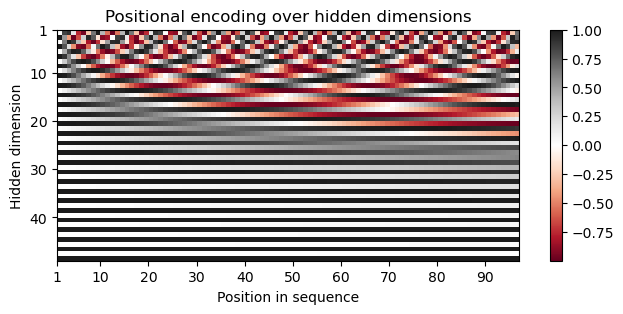

In [6]:
## PyTorch
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

seq_len, d_k = 3, 2
# pl.seed_everything(42)
q = torch.randn(seq_len, d_k)
k = torch.randn(seq_len, d_k)
v = torch.randn(seq_len, d_k)
values, attention = scaled_dot_product(q, k, v)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("Values\n", values)
print("Attention\n", attention)

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be 0 modulo number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Stack all weight matrices 1...h together for efficiency
        # Note that in many implementations you see "bias=False" which is optional
        self.qkv_proj = nn.Linear(input_dim, 3*embed_dim)
        self.o_proj = nn.Linear(embed_dim, embed_dim)

        self._reset_parameters()

    def _reset_parameters(self):
        # Original Transformer initialization, see PyTorch documentation
        nn.init.xavier_uniform_(self.qkv_proj.weight)
        self.qkv_proj.bias.data.fill_(0)
        nn.init.xavier_uniform_(self.o_proj.weight)
        self.o_proj.bias.data.fill_(0)

    def forward(self, x, mask=None, return_attention=False):
        batch_size, seq_length, _ = x.size()
        qkv = self.qkv_proj(x)

        # Separate Q, K, V from linear output
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3*self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # [Batch, Head, SeqLen, Dims]
        q, k, v = qkv.chunk(3, dim=-1)

        # Determine value outputs
        values, attention = scaled_dot_product(q, k, v, mask=mask)
        values = values.permute(0, 2, 1, 3) # [Batch, SeqLen, Head, Dims]
        values = values.reshape(batch_size, seq_length, self.embed_dim)
        o = self.o_proj(values)

        if return_attention:
            return o, attention
        else:
            return o
        
class EncoderBlock(nn.Module):

    def __init__(self, input_dim, num_heads, dim_feedforward, dropout=0.0):
        """
        Inputs:
            input_dim - Dimensionality of the input
            num_heads - Number of heads to use in the attention block
            dim_feedforward - Dimensionality of the hidden layer in the MLP
            dropout - Dropout probability to use in the dropout layers
        """
        super().__init__()

        # Attention layer
        self.self_attn = MultiheadAttention(input_dim, input_dim, num_heads)

        # Two-layer MLP
        self.linear_net = nn.Sequential(
            nn.Linear(input_dim, dim_feedforward),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Linear(dim_feedforward, input_dim)
        )

        # Layers to apply in between the main layers
        self.norm1 = nn.LayerNorm(input_dim)
        self.norm2 = nn.LayerNorm(input_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Attention part
        attn_out = self.self_attn(x, mask=mask)
        x = x + self.dropout(attn_out)
        x = self.norm1(x)

        # MLP part
        linear_out = self.linear_net(x)
        x = x + self.dropout(linear_out)
        x = self.norm2(x)

        return x
    
class TransformerEncoder(nn.Module):

    def __init__(self, num_layers, **block_args):
        super().__init__()
        self.layers = nn.ModuleList([EncoderBlock(**block_args) for _ in range(num_layers)])

    def forward(self, x, mask=None):
        for l in self.layers:
            x = l(x, mask=mask)
        return x

    def get_attention_maps(self, x, mask=None):
        attention_maps = []
        for l in self.layers:
            _, attn_map = l.self_attn(x, mask=mask, return_attention=True)
            attention_maps.append(attn_map)
            x = l(x)
        return attention_maps
    
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        """
        Inputs
            d_model - Hidden dimensionality of the input.
            max_len - Maximum length of a sequence to expect.
        """
        super().__init__()

        # Create matrix of [SeqLen, HiddenDim] representing the positional encoding for max_len inputs
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        # register_buffer => Tensor which is not a parameter, but should be part of the modules state.
        # Used for tensors that need to be on the same device as the module.
        # persistent=False tells PyTorch to not add the buffer to the state dict (e.g. when we save the model)
        self.register_buffer('pe', pe, persistent=False)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x
    
import matplotlib.pyplot as plt
plt.set_cmap('cividis')
%matplotlib inline    
    
encod_block = PositionalEncoding(d_model=48, max_len=96)
pe = encod_block.pe.squeeze().T.cpu().numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
pos = ax.imshow(pe, cmap="RdGy", extent=(1,pe.shape[1]+1,pe.shape[0]+1,1))
fig.colorbar(pos, ax=ax)
ax.set_xlabel("Position in sequence")
ax.set_ylabel("Hidden dimension")
ax.set_title("Positional encoding over hidden dimensions")
ax.set_xticks([1]+[i*10 for i in range(1,1+pe.shape[1]//10)])
ax.set_yticks([1]+[i*10 for i in range(1,1+pe.shape[0]//10)])
plt.show()    

In [4]:
import torch
_ = torch.tensor([0.2126, 0.7152, 0.0722], names=['c'])

C:\Users\mzhao\AppData\Local\Temp\ipykernel_249972\1646494204.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10/core/TensorImpl.h:1761.)
  _ = torch.tensor([0.2126, 0.7152, 0.0722], names=['c'])


In [5]:
img_t = torch.randn(3, 5, 5) # shape [channels, rows, columns]
weights = torch.tensor([0.2126, 0.7152, 0.0722])
batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape


unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [15]:
img_t.size(0)

3

In [14]:
unsqueezed_weights, batch_weights[1], batch_t[1][0]*0.2126, batch_t[1][1]*0.7152

(tensor([[[0.2126]],
 
         [[0.7152]],
 
         [[0.0722]]]),
 tensor([[[ 0.0807,  0.3880, -0.0241, -0.0897,  0.0553],
          [ 0.1387, -0.3558,  0.0803,  0.3073,  0.0417],
          [ 0.1513,  0.3157,  0.1681, -0.1146,  0.5032],
          [ 0.1700, -0.1654, -0.1617,  0.0277, -0.1240],
          [ 0.0384,  0.2880,  0.3413, -0.0979,  0.0711]],
 
         [[ 0.0989,  0.1896,  0.2428, -1.1069,  0.8830],
          [ 0.9399,  1.1653, -0.0043, -0.0417,  1.0848],
          [-0.1445, -0.9302, -0.3292, -0.2906,  0.9009],
          [ 0.7256, -0.5880, -0.4107,  0.2461, -0.1811],
          [ 1.1483, -0.7916, -1.0151,  0.2985,  0.2352]],
 
         [[-0.0019, -0.0944,  0.0474,  0.0087, -0.0428],
          [ 0.0460,  0.0536, -0.0283,  0.0961, -0.0517],
          [ 0.0257,  0.0126,  0.0092,  0.0404, -0.1280],
          [-0.1045, -0.0228, -0.0848,  0.0314, -0.0468],
          [-0.0302,  0.0103,  0.1589, -0.1518, -0.0530]]]),
 tensor([[ 0.0807,  0.3880, -0.0241, -0.0897,  0.0553],
         [ 